In [4]:
import pandas as pd
df=pd.read_csv("Taitanic.csv")

In [5]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [10]:
df['Cabin'].isnull()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

In [12]:
import numpy as np

## Creating new column and if null adding in tht with 1 and 0 for mo null
df['Cabin_null']=np.where(df['Cabin'].isnull(),1,0)
## Find the percentage of null values
df['Cabin_null'].mean()


0.7710437710437711

In [13]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [14]:
df['Cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: Cabin_null, Length: 891, dtype: int32

In [16]:
df.groupby(['Survived'])['Cabin']

In [18]:
df.groupby(['Survived'])['Cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

### All the techniques of handling Missing values
1.Mean/Median/Mode Replacement
2.Random Sample Imputation.
3.Capturing Nan Values with a new feature
4.End of Distribution imputation
5.Arbitary Imputation
6.Frequent Categories imputation

#### Mean/Median/Mode Imputation
When should we apply?
Mean/Median imputation has the assumption tht the data are missing compeletely at random (MCAR)
We solve this by replacing the NAN with most frequent occurance of the variable

In [23]:
df=pd.read_csv("Taitanic.csv",usecols=['Age','Fare','Survived'])

In [24]:
df.head()


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
### Lets goes and see the percenatage of missing values
df.isnull().mean()


Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [31]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [32]:
median=df.Age.median()
median

28.0

In [33]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Agemedian,Age_median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [34]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334042
13.019696550973201


In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

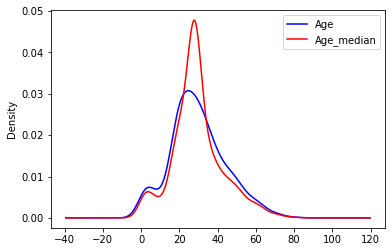

In [36]:
plt.figure()
df.Age.plot(kind='kde', color='blue', label='Age')
df.Age_median.plot(kind='kde', color='red', label='Age_median')
plt.legend()
plt.show()

### Advantages of Mean/Medium Imputation
1.Easy to implement(Robust to outliers)

2.Faster way to obtain the complete dataset
### DisAdvantages of Mean/Medium Imputation
1.Change or Distortion in the original variance

2.Impacts Correlation

